### Toy example: estimate cancer cell percentage using PIL library

Summary: use K mean clustering to get the major colors in a hispathology image from [this paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3579427/). The goal is to estimate ***the percentage of red cells (CK5 positive) *** in this picture. We selected two colors as upper and lower bounds of the RGB filter and estimated the percentage of CK5 positive is 30%.

* When there are lots of pictures: RGB value normalization
* Alternative way of build a filter is to make a reference color
* K means clustering: require cross validation to find the best K

In [18]:
import PIL

import matplotlib.pyplot as plt
%matplotlib inline

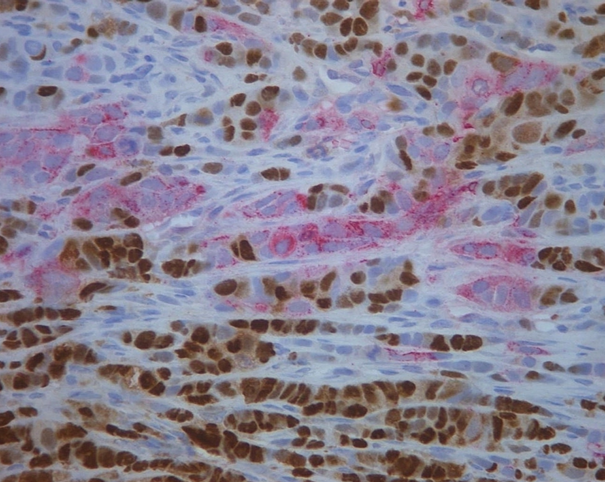

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image("./fig1.jpeg", width = 300, height = 400)

### Count the pixel RGB values

In [47]:
from PIL import Image
im = Image.open("./fig1.jpeg")
pix = im.load()
(width, height) =im.size #Get the width and hight of the image for iterating over
for x in range(5):
    for y in range(5):
        print(pix[x,y]) #Get first 25*25 pixcels the RGBA Value 

(107, 86, 85, 255)
(107, 86, 84, 255)
(102, 82, 77, 255)
(102, 83, 76, 255)
(102, 84, 74, 255)
(101, 81, 81, 255)
(100, 80, 79, 255)
(97, 77, 73, 255)
(99, 79, 73, 255)
(96, 77, 69, 255)
(103, 83, 85, 255)
(101, 81, 81, 255)
(96, 76, 74, 255)
(96, 77, 73, 255)
(101, 82, 76, 255)
(110, 88, 92, 255)
(107, 87, 89, 255)
(100, 81, 81, 255)
(98, 80, 79, 255)
(107, 87, 84, 255)
(115, 93, 98, 255)
(112, 91, 96, 255)
(103, 84, 85, 255)
(101, 82, 82, 255)
(107, 86, 86, 255)


In [26]:
width, height

(605, 482)

### Cluster the image color k = 3

In [10]:
from PIL import Image
from collections import namedtuple
from math import sqrt
import random
from matplotlib import patches


In [13]:
p1 = Image.open("./fig1.jpeg")
Point = namedtuple('Point', ('coords', 'n', 'ct'))
Cluster = namedtuple('Cluster', ('points', 'center', 'n'))

In [12]:
def get_points(img):
    points = []
    w, h = img.size
    for count, color in img.getcolors(w * h):
        points.append(Point(color, 3, count))
    return points

rtoh = lambda rgb: '#%s' % ''.join(('%02x' % p for p in rgb))

def colorz(filename, n=3):
    img = Image.open(filename)
    img.thumbnail((200, 200))
    w, h = img.size

    points = get_points(img)
    clusters = kmeans(points, n, 1)
    rgbs = [map(int, c.center.coords) for c in clusters]
    return map(rtoh, rgbs)

def euclidean(p1, p2):
    return sqrt(sum([
        (p1.coords[i] - p2.coords[i]) ** 2 for i in range(p1.n)
    ]))

def calculate_center(points, n):
    vals = [0.0 for i in range(n)]
    plen = 0
    for p in points:
        plen += p.ct
        for i in range(n):
            vals[i] += (p.coords[i] * p.ct)
    return Point([(v / plen) for v in vals], n, 1)

def kmeans(points, k, min_diff):
    clusters = [Cluster([p], p, p.n) for p in random.sample(points, k)]

    while 1:
        plists = [[] for i in range(k)]

        for p in points:
            smallest_distance = float('Inf')
            for i in range(k):
                distance = euclidean(p, clusters[i].center)
                if distance < smallest_distance:
                    smallest_distance = distance
                    idx = i
            plists[idx].append(p)

        diff = 0
        for i in range(k):
            old = clusters[i]
            center = calculate_center(plists[i], old.n)
            new = Cluster(plists[i], center, old.n)
            clusters[i] = new
            diff = max(diff, euclidean(old.center, new.center))

        if diff < min_diff:
            break

    return clusters

In [14]:
c1 =list(colorz('./fig1.jpeg', n = 3))


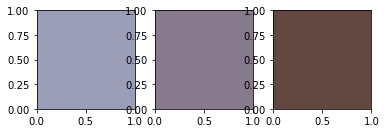

In [19]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(131, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[0]))
ax1 = fig1.add_subplot(132, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[1]))
ax1 = fig1.add_subplot(133, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[2]))


### Cluster the image color k = 15

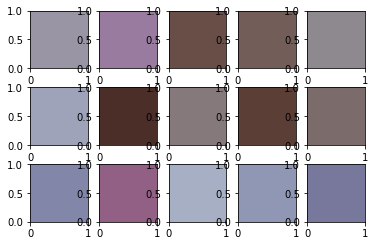

In [57]:
c1 =list(colorz('./fig1.jpeg', n = 15))

fig1 = plt.figure()
ax1 = fig1.add_subplot(351, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[0]))
ax1 = fig1.add_subplot(352, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[1]))
ax1 = fig1.add_subplot(353, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[2]))
ax1 = fig1.add_subplot(354, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[3]))
ax1 = fig1.add_subplot(355, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[4]))
ax1 = fig1.add_subplot(356, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[5]))
ax1 = fig1.add_subplot(357, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[6]))
ax1 = fig1.add_subplot(358, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[7]))
ax1 = fig1.add_subplot(359, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[8]))
ax1 = fig1.add_subplot(3,5,10, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[9]))
ax1 = fig1.add_subplot(3,5,11, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[10]))

ax1 = fig1.add_subplot(3,5,12, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[11]))

ax1 = fig1.add_subplot(3,5,13, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[12]))

ax1 = fig1.add_subplot(3,5,14, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[13]))

ax1 = fig1.add_subplot(3,5,15, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[14]))



#### We selecte two colors as upper and lower bounds of our filter, below is those two colors

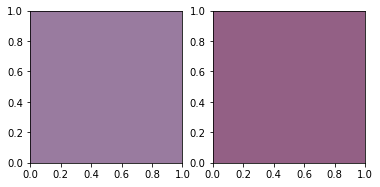

In [73]:
fig1 = plt.figure()

ax1 = fig1.add_subplot(1,2,1, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[1]))
ax1 = fig1.add_subplot(1,2,2, aspect='equal')
ax1.add_patch(
    patches.Rectangle((0, 0), 2, 2, color = c1[11]))

In [76]:
import matplotlib.colors as colors

deep_red = c1[11]
colors.hex2color(deep_red)

(0.5764705882352941, 0.3764705882352941, 0.5215686274509804)

In [77]:
deep_red_std_rgb = [i*255 for i in colors.hex2color(deep_brown)]
deep_red_std_rgb

[75.0, 46.0, 39.0]

In [78]:
light_red = c1[1]
colors.hex2color(light_red)
light_red_std_rgb = [i*255 for i in colors.hex2color(light_red)]
light_red_std_rgb

[153.0, 123.0, 159.0]

### so here we use these two sets of rgb value as upper and lower bound of pixel filter

In [79]:
from PIL import Image
im = Image.open("./fig1.jpeg")
pix = im.load()
(width, height) =im.size #Get the width and hight of the image for iterating over

target = 0
for x in range(width):
    for y in range(height):
        cur = pix[x, y]
        if (cur[0] in range(75, 153 + 1)) and \
        (cur[1] in range(46, 123 + 1)) and \
        (cur[2] in range(39, 159 + 1)):
            target += 1

In [80]:
target/(width* height)*100

30.092932341140568

### Here we calculated 30% of area as red (CK5 positive)